#**Binory Classification** 
-**FOR FABRIC DEFECT DETECTION**

##IMPORT LIBRARYS FOR CONNECT WITH GOOGLE DRIVE

In [0]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 7.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


GIVE AUTHENTICATION TO ACCESS DRIVE

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



##pre_requisite

DOWNLOAD .PY FILES AND OTHER DEPENDENCY FILES AND UNZIP IT

In [0]:
download = drive.CreateFile({'id': '1g86PU_EeWKMnPcrfleTebZpw5jAaSTMC'})
download.GetContentFile('image-classification-keras_bn.zip') # here we need to enter the file name that we want to download from google drive
!unzip image-classification-keras_bn.zip -d dest_folder

Archive:  image-classification-keras_bn.zip
   creating: dest_folder/image-classification-keras/
   creating: dest_folder/image-classification-keras/examples/
   creating: dest_folder/image-classification-keras/images/
   creating: dest_folder/image-classification-keras/images/not_santa/
  inflating: dest_folder/image-classification-keras/images/not_santa/aug_1.jpg  
  inflating: dest_folder/image-classification-keras/images/not_santa/aug_10.jpg  
  inflating: dest_folder/image-classification-keras/images/not_santa/aug_100.jpg  
  inflating: dest_folder/image-classification-keras/images/not_santa/aug_1000.jpg  
  inflating: dest_folder/image-classification-keras/images/not_santa/aug_10000.jpg  
  inflating: dest_folder/image-classification-keras/images/not_santa/aug_1001.jpg  
  inflating: dest_folder/image-classification-keras/images/not_santa/aug_1002.jpg  
  inflating: dest_folder/image-classification-keras/images/not_santa/aug_1003.jpg  
  inflating: dest_folder/image-classificatio

In [0]:
!ls

adc.json  dest_folder  image-classification-keras_bn.zip  sample_data


GO INSIDE THE FILES

In [0]:
%cd dest_folder/image-classification-keras/
!ls

/content/dest_folder/image-classification-keras
examples  images  pyimagesearch  test_network.py  train_network.py


INSTALL IMUTILS

In [0]:
!pip install imutils

##Train

In [0]:
import time
start = time.time()
!python train_network.py --dataset images --model Fabric_Binory.model
elapsed = (time.time() - start)
print(elapsed)

Using TensorFlow backend.
[INFO] loading images...
[INFO] compiling model...
Instructions for updating:
Colocations handled automatically by placer.
[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
2019-02-24 12:53:05.090020: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-02-24 12:53:05.093793: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x343a9a0 executing computations on platform Host. Devices:
2019-02-24 12:53:05.093880: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
468/468 [==============================] - 57s 123ms/step - loss: 0.6961 - acc: 0.5074 - val_loss: 0.6934 - val_acc: 0.4998
Epoch 2/25
468/468 [==============================] - 56s 119ms/step - loss: 0.5773 - acc: 0.6630 - val_loss: 0.3263 - val_acc: 0.8850
Epoch 3/25
468/468 [==============================] - 56s 120ms/step - loss: 0.3553 - acc: 0.8533 - val_loss:

##Test

In [0]:
ls

examples/       images/   pyimagesearch/   train_network.py
hyp_install.pb  plot.png  test_network.py


download test images

In [0]:
download = drive.CreateFile({'id': '1j57U2uYKwPm6tmI6bwHTiqQfKYDadFOB'})
download.GetContentFile('test_notes.zip') # here we need to enter the file name that we want to download from google drive
!unzip test_notes.zip -d test_folder

Archive:  test_notes.zip
   creating: test_folder/test_notes/
  inflating: test_folder/test_notes/test1.JPG  
  inflating: test_folder/test_notes/test10.JPG  
  inflating: test_folder/test_notes/test2.JPG  
  inflating: test_folder/test_notes/test3.JPG  
  inflating: test_folder/test_notes/test4.JPG  
  inflating: test_folder/test_notes/test5.JPG  
  inflating: test_folder/test_notes/test6.JPG  
  inflating: test_folder/test_notes/test7.JPG  
  inflating: test_folder/test_notes/test8.JPG  
  inflating: test_folder/test_notes/test9.JPG  


In [0]:
ls

examples/       images/   pyimagesearch/  test_network.py  train_network.py
hyp_install.pb  plot.png  test_folder/    test_notes.zip


test model

[INFO] loading network...
NO_ERROR: 96.96%


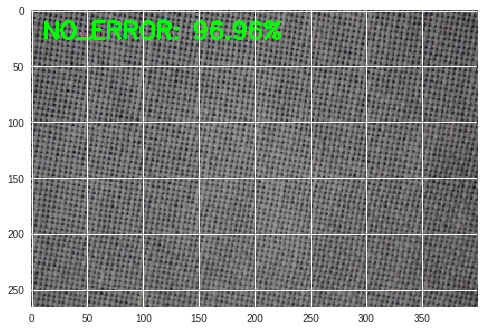

In [0]:
# USAGE
# python test_network.py --model santa_not_santa.model --image images/examples/santa_01.png
import time
start = time.time()
image_path="test_folder/test_notes/test1.JPG"
model_path="Fabric_Binory.model"

# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2

from matplotlib import pyplot as plt

# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-m", "--model", required=True,
#	help="path to trained model model")
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())

# load the image
image = cv2.imread(image_path)
orig = image.copy()

# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# load the trained convolutional neural network
print("[INFO] loading network...")
model = load_model(model_path)

# classify the input image
(notSanta, santa) = model.predict(image)[0]

# build the label
label = "HOLE" if santa > notSanta else "NO_ERROR"
proba = santa if santa > notSanta else notSanta
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)

# draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)

# show the output image
# cv2.imshow("Output", output)
# cv2.waitKey(0)
img2 = output[:,:,::-1]
plt.imshow(img2)
elapsed = (time.time() - start)
#print(elapsed)

In [0]:
print(elapsed)

2.0639753341674805
